In [8]:
import talib
import numpy as np
import pandas as pd

In [5]:
btc_raw_df = pd.read_parquet("/home/giujorge/Documents/Projets/bot_strategies/data/raw/BTC-USDT.csv.parquet.gzip")
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,7960.54017996
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,7960.45262989
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,7960.37529526
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,7960.37529526
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,7960.37529526
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,0
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,0
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,0


In [15]:
def applyindicators(df):
    df['SMA_200'] = df.close.rolling(200).mean()
    df['SMA_20'] = df.close.rolling(20).mean()
    df['stddev'] = df.close.rolling(20).std()

    df['Upper'] = df.SMA_20 + 2.5 * df.stddev
    df['Lower'] = df.SMA_20 - 2.5 * df.stddev

    df['rsi'] = talib.RSI(df.close, timeperiod=2)

In [16]:
applyindicators(btc_raw_df)

<AxesSubplot:xlabel='timestamp'>

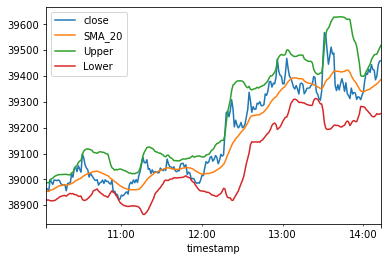

In [22]:
btc_raw_df.tail(250)[['close', 'SMA_20', 'Upper', 'Lower']].plot()

In [23]:
def conditions(df):
    df['Buy'] = np.where(
                        (df.close > df.SMA_200) &
                        (df.close < df.Lower) &
                        (0.97 * df.close >= df.low.shift(-1)),
                        1, 0
                        )

    df['Sell'] = np.where((df.rsi > 50), 1, 0)

    df['Buyprice'] = 0.97 * df.close
    df["Sellprice"] = df.open.shift(-1)


In [24]:
conditions(btc_raw_df)

In [25]:
btc_raw_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,...,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.77518300,1502942459999,7564.90685084,3,0.07518300,320.39085084,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4133.6356,4261.48
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.00000000,1502942519999,0.00000000,0,0.00000000,0.00000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,4133.6356,4280.56
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.26107400,1502942579999,1117.54292144,2,0.26107400,1117.54292144,...,NaN,NaN,NaN,NaN,NaN,100.000000,0,1,4152.1432,4261.48
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.01200800,1502942639999,51.17185184,3,0.01200800,51.17185184,...,NaN,NaN,NaN,NaN,NaN,33.333333,0,0,4133.6356,4261.48
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.14079600,1502942699999,599.99933808,1,0.14079600,599.99933808,...,NaN,NaN,NaN,NaN,NaN,33.333333,0,0,4133.6356,4261.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-18 14:09:00,39423.05,39423.06,39377.05,39385.62,22.37338000,1650290999999,881512.83100580,758,6.59638000,259885.09290650,...,39206.5102,39365.4510,47.309665,39483.725164,39247.176836,9.784868,0,0,38204.0514,39385.61
2022-04-18 14:10:00,39385.61,39401.54,39370.24,39400.00,29.43069000,1650291059999,1159033.25545720,788,14.55146000,573044.31840130,...,39208.5499,39369.8030,46.217686,39485.347214,39254.258786,43.129445,0,0,38218.0000,39400.00
2022-04-18 14:11:00,39400.00,39444.80,39399.83,39442.55,25.65637000,1650291119999,1011437.53518520,720,13.72377000,541044.94403500,...,39210.8379,39374.2480,48.786032,39496.213079,39252.282921,82.157368,0,1,38259.2735,39442.54


In [33]:
def matchtrades(df):
    Buy_Sells = btc_raw_df[(btc_raw_df.Buy == 1) |
                            (btc_raw_df.Sell == 1)] 

    matched_Buy_Sells = Buy_Sells[(Buy_Sells.Buy.diff() == 1) |
                        (Buy_Sells.Sell.diff() == 1)]
    return matched_Buy_Sells

In [35]:
trades = matchtrades(btc_raw_df)

In [36]:
trades

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,...,SMA_200,SMA_20,stddev,Upper,Lower,rsi,Buy,Sell,Buyprice,Sellprice
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-07-27 23:17:00,11150.02,11150.93,11080.00,11116.93,343.42780300,1595891879999,3815601.89121625,2830,161.15689200,1789984.45508158,...,10985.59095,11172.7010,21.714901,11226.988251,11118.413749,0.934925,1,0,10783.4221,11116.54
2020-07-27 23:20:00,10823.76,10998.18,10815.30,10952.40,443.70197000,1595892059999,4850004.74156976,5707,231.69806700,2533332.42855612,...,10987.62710,11130.6405,95.368908,11369.062770,10892.218230,51.486750,0,1,10623.8280,10950.13
2022-03-16 03:11:00,40738.38,40738.38,40634.11,40646.07,158.62021000,1647400319999,6451546.77691810,3098,65.58536000,2667333.90415290,...,39858.09225,40814.7345,63.911174,40974.512434,40654.956566,0.920745,1,0,39426.6879,40646.07
2022-03-16 03:16:00,39480.70,39695.40,39472.51,39654.43,274.04434000,1647400619999,10848873.71228210,4969,147.32001000,5832209.48897100,...,39864.64080,40495.6420,555.403383,41884.150458,39107.133542,65.054410,0,1,38464.7971,39654.42


In [40]:
profit = (trades.Sellprice.shift(-1) - trades.Buyprice) / trades.Buyprice * 100

In [41]:
profit[::2]

timestamp
2020-07-27 23:17:00    1.545965
2022-03-16 03:11:00    0.577609
dtype: float64

In [49]:
btc_raw_df['volume'] = btc_raw_df['volume'].astype(float)

In [50]:
new5minDf = btc_raw_df.resample('5t', closed='right').agg(dict(open='first', high='max', low='min', close='last', volume='sum', trades='sum'))

In [51]:
new5minDf

,open,high,low,close,volume,trades
timestamp,,,,,,
2017-08-17 03:55:00,4261.48,4261.48,4261.48,4261.48,1.775183,3
2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,0.413878,6
2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000,0
2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000,0
2017-08-17 04:15:00,4261.48,4264.88,4261.48,4264.88,1.967680,15
...,...,...,...,...,...,...
2022-04-18 13:50:00,39312.95,39389.99,39233.13,39309.94,453.737310,6720
2022-04-18 13:55:00,39309.93,39358.63,39302.15,39339.15,224.074440,4375
2022-04-18 14:00:00,39339.16,39455.00,39332.44,39414.30,207.509070,4457


In [52]:
new1dinDf = btc_raw_df.resample('1440t', closed='right').agg(dict(open='first', high='max', low='min', close='last', volume='sum', trades='sum'))

In [53]:
new1dinDf

,open,high,low,close,volume,trades
timestamp,,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.172573,3428
2017-08-18,4285.08,4371.52,3938.77,4108.37,1200.577922,5237
2017-08-19,4108.37,4184.69,3850.00,4139.98,380.597909,2148
2017-08-20,4139.98,4211.08,4032.62,4086.29,467.338908,2324
2017-08-21,4062.78,4119.62,3911.79,4016.00,691.601958,3972
...,...,...,...,...,...,...
2022-04-14,41093.15,41500.00,39551.94,39902.84,36756.260510,803711
2022-04-15,39902.85,40870.36,39766.40,40563.62,24041.035760,616599
2022-04-16,40563.62,40709.35,39991.55,40370.01,15783.987360,423148


In [55]:
applyindicators(new1dinDf)

<AxesSubplot:xlabel='timestamp'>

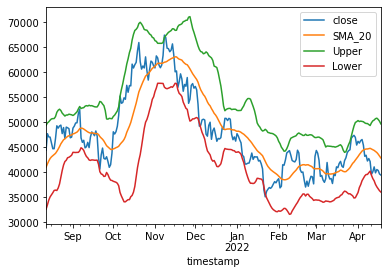

In [56]:
new1dinDf.tail(250)[['close', 'SMA_20', 'Upper', 'Lower']].plot()

In [57]:
conditions(new1dinDf)

In [58]:
trades_1d= matchtrades(new1dinDf)

In [59]:
profit_1d = (trades_1d.Sellprice.shift(-1) - trades_1d.Buyprice) / trades_1d.Buyprice * 100

In [60]:
profit_1d[::2]

timestamp
2020-07-27 23:17:00    1.545965
2022-03-16 03:11:00    0.577609
dtype: float64

<AxesSubplot:xlabel='timestamp'>

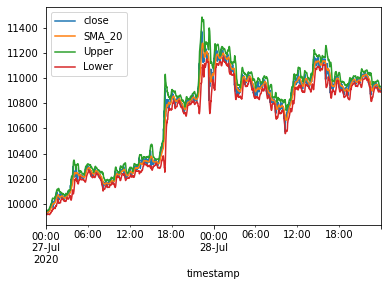

In [66]:
btc_raw_df['2020-07-27': "2020-07-28"][['close', 'SMA_20', 'Upper', 'Lower']].plot()

<AxesSubplot:xlabel='timestamp'>

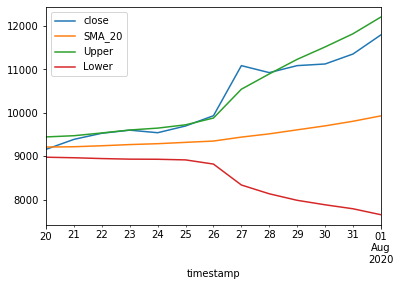

In [69]:
new1dinDf['2020-07-20': "2020-08-01"][['close', 'SMA_20', 'Upper', 'Lower']].plot()